# Direct Transfer Function

The Directed Transfer Function (DTF) is a frequency-domain measure of directed influence between multivariate time series.
The DTF value ranges between 0 and 1, representing the relative strength of directed influence from a source node j to a target node i at a specific frequency f.

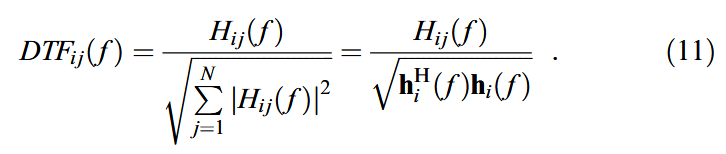

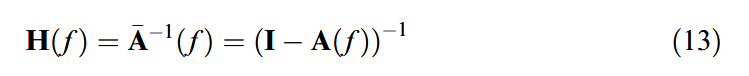

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 1: Define Model Parameters (Example 2 in the paper)

# Model order (p=1 for this example)
p = 1

# Coefficient matrix A_1 (3x3) for the MAR model (Equation 23)
A1 = np.array([
    [0.5, 0.3, 0.4],    
    [-0.5, 0.3, 1.0],   
    [0.0, -0.3, -0.2]   # no x1(n-1) term
])

In [12]:
# Step 2: Compute Transfer Function Matrix H(f)

def compute_H(f, A1):
    """
    Compute the transfer function matrix H(f) = (I - A(f))^{-1}.
    
    Args:
        f   : Frequency (normalized, 0 ≤ f ≤ 0.5)
        A1  : Coefficient matrix of the MAR model (lag 1)
    
    Returns:
        H_f : 3x3 complex-valued transfer function matrix at frequency f
    """
    z = np.exp(-1j * 2 * np.pi * f)  # z^{-1} = e^{-j2πf}
    A_f = A1 * z                     # A(f) = A1 * z^{-1}
    I = np.eye(3)                    
    A_bar = I - A_f                  # I - A(f)
    H_f = np.linalg.inv(A_bar)       # H(f) = (I - A(f))^{-1}
    return H_f

In [13]:
# Step 3: Compute DTF

def compute_DTF(H_f):
    """
    Compute Directed Transfer Function (DTF) from H(f).
    
    Args:
        H_f : 3x3 complex transfer function matrix
    
    Returns:
        DTF : 3x3 matrix of |DTF_ij(f)| values
    """
    
    DTF = np.zeros_like(H_f, dtype=np.float64)
    for i in range(3):
        row = H_f[i, :]
        denominator = np.sqrt(np.sum(np.abs(row)**2))  # Denominator: sqrt(sum(|H_ik(f)|^2))
        DTF[i, :] = np.abs(row) / denominator if denominator != 0 else 0
    return DTF

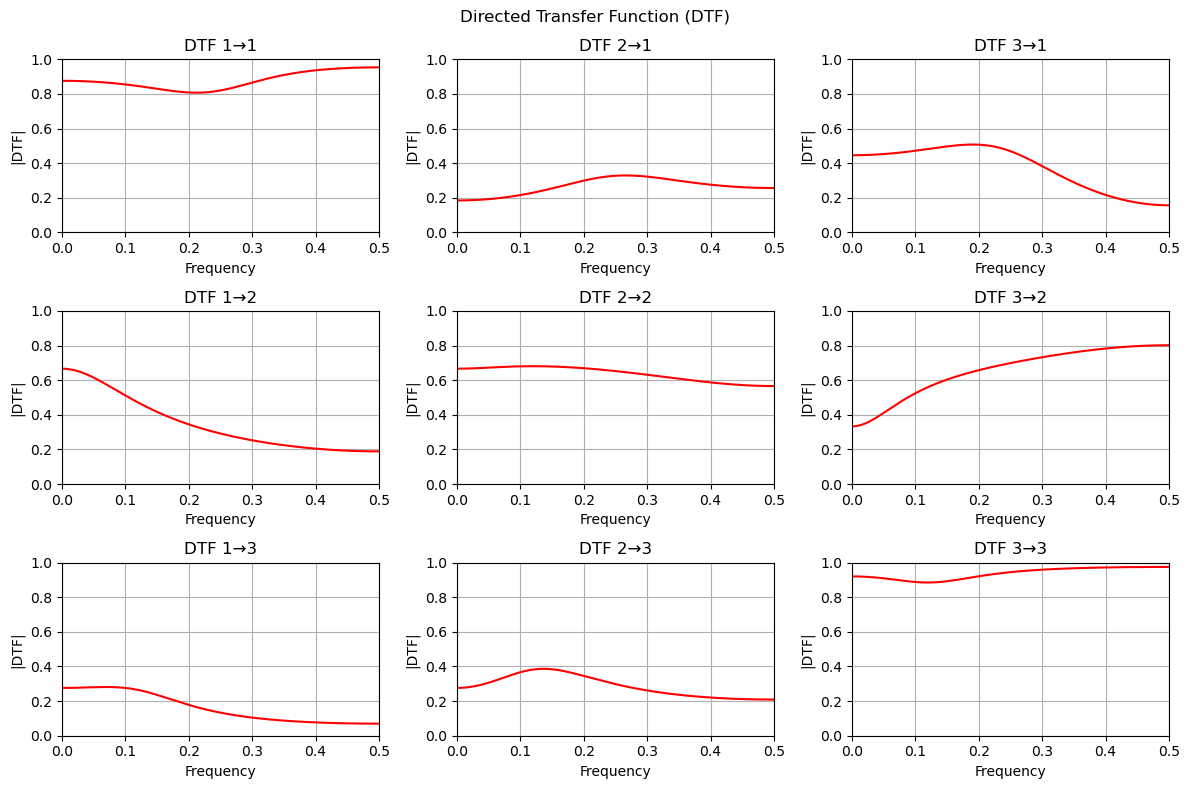

In [15]:
# Frequency range (0 to 0.5, normalized)
freqs = np.linspace(0, 0.5, 500)
dtf_results = np.zeros((len(freqs), 3, 3))

# Compute DTF for all frequencies
for idx, f in enumerate(freqs):
    H_f = compute_H(f, A1)
    dtf = compute_DTF(H_f)
    dtf_results[idx] = dtf

# Visualization
fig, axes = plt.subplots(3, 3, figsize=(12, 8))
plt.suptitle("Directed Transfer Function (DTF)")


for i in range(3):
    for j in range(3):
        ax = axes[i, j]
        ax.plot(freqs, dtf_results[:, i, j], 'r')
        ax.set_xlabel("Frequency")
        ax.set_ylabel("|DTF|")
        ax.set_title(f"DTF {j+1}→{i+1}")
        ax.set_xlim(0, 0.5)
        ax.set_ylim(0, 1)  # DTF is normalized between 0 and 1
        ax.grid(True)

plt.tight_layout()
plt.savefig("dtf_results.png", bbox_inches="tight")
plt.show()

In [16]:
# Verify key properties
# 1. Check if DTF_31 ≈ 0 (x1 has no direct effect on x3)
print("Max DTF_31:", np.max(dtf_results[:, 2, 0]))  # Should be near 0

# 2. Check normalization: sum(|DTF_ij|^2) = 1 for each row
for i in range(3):
    row_sum = np.sum(dtf_results[100, i, :]**2)  # Pick a frequency (e.g., index 100)
    print(f"Row {i+1} sum of squares at f={freqs[100]:.2f}: {row_sum:.4f}")

Max DTF_31: 0.2814802606070398
Row 1 sum of squares at f=0.10: 1.0000
Row 2 sum of squares at f=0.10: 1.0000
Row 3 sum of squares at f=0.10: 1.0000


# Reference

[[1]](https://link.springer.com/article/10.1007/pl00007990) Baccalá, L. A., & Sameshima, K. (2001). Partial directed coherence: a new concept in neural structure determination. Biological cybernetics, 84(6), 463-474.
